<a href="https://colab.research.google.com/github/Om-soni-15/Gurgaon-Real-Estate-Price-Prediction-Analytics-Platform/blob/master/Notebooks/Outlier_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Gurgaon_properties_cleaned_v2.csv')

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,Carpet_area,Super_built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,bptp visionnaire,sector 70,5.25,20115.0,2610.0,Plot area 290(242.48 sq.m.),5,4,4,3.0,North-East,New Property,2609.0,NaN,NaN,0,1,0,0,0,unfurnished,53
1,house,independent,sector 43,2.10,38251.0,549.0,Plot area 61(51 sq.m.),10,10,4,5.0,West,New Property,549.0,NaN,NaN,0,1,0,0,0,unfurnished,26
2,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,4,5.0,North,Relatively New,1161.0,NaN,NaN,0,1,0,0,0,semifurnished,53
3,house,independent,sector 43,3.00,53763.0,558.0,Plot area 62(51.84 sq.m.),12,12,4,5.0,West,New Property,558.0,NaN,NaN,0,0,0,0,1,semifurnished,26
4,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,4,4.0,East,Relatively New,1152.0,NaN,NaN,0,1,0,0,0,semifurnished,26


In [ ]:
# price,price_per_sqft,area,Built_up_area,Carpet_area,Super_built_up_area

<Axes: ylabel='price'>

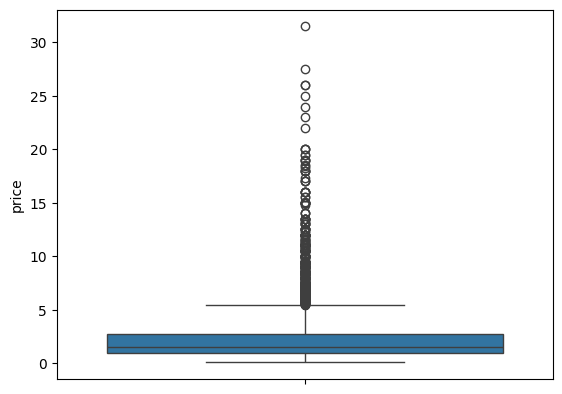

In [ ]:
sns.boxplot(df['price'])

<ipython-input-10-86c1ddc3c66a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

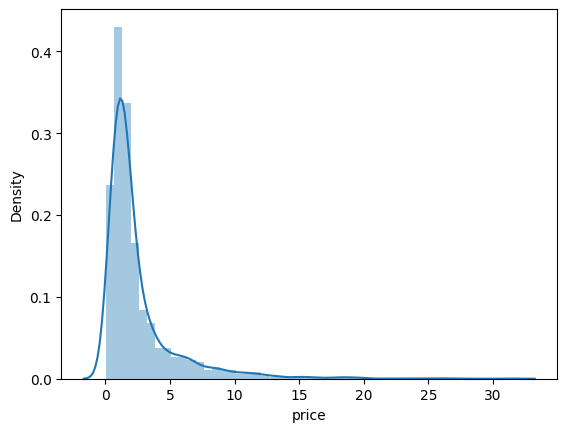

In [ ]:
sns.distplot(df['price'])

In [ ]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(416,
 count    416.000000
 mean       9.201971
 std        4.060423
 min        5.460000
 25%        6.440000
 50%        8.000000
 75%       10.607500
 max       31.500000
 Name: price, dtype: float64)

In [ ]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,Carpet_area,Super_built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
733,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,4,3.0,North-East,Moderately Old,8997.0,NaN,NaN,1,1,1,1,0,semifurnished,93
511,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,4,3.0,North-East,Relatively New,11282.0,NaN,NaN,1,1,0,1,1,semifurnished,47
503,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,4,4.0,North-West,New Property,400.0,350.0,NaN,1,1,1,1,0,semifurnished,78
541,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,4,2.0,North-East,New Property,4543.0,NaN,NaN,1,1,0,1,1,semifurnished,153
673,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,4,2.0,North,Moderately Old,8997.0,NaN,NaN,1,1,1,1,0,unfurnished,0
471,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,400.0,NaN,NaN,1,1,0,1,0,semifurnished,136
659,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,4,2.0,South-West,Relatively New,8997.0,NaN,NaN,1,1,1,1,0,semifurnished,169
487,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,8997.0,NaN,NaN,0,1,0,0,0,semifurnished,64
464,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,4,4.0,North-East,New Property,4516.0,NaN,NaN,1,1,1,1,0,unfurnished,171
6,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,4,4.0,NaN,New Property,4498.0,NaN,NaN,0,1,0,0,0,furnished,30


Price_per_sqft

<Axes: ylabel='price_per_sqft'>

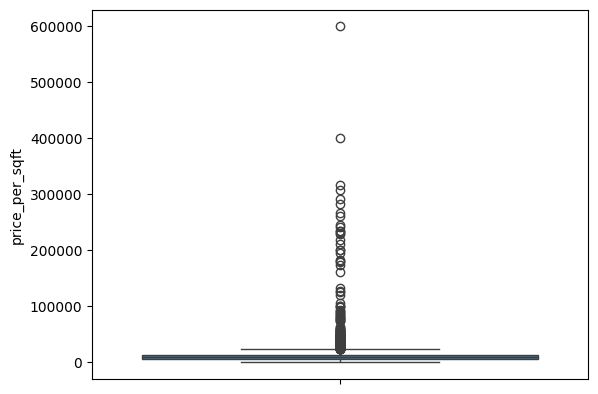

In [ ]:
sns.boxplot(df['price_per_sqft'])

<ipython-input-14-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

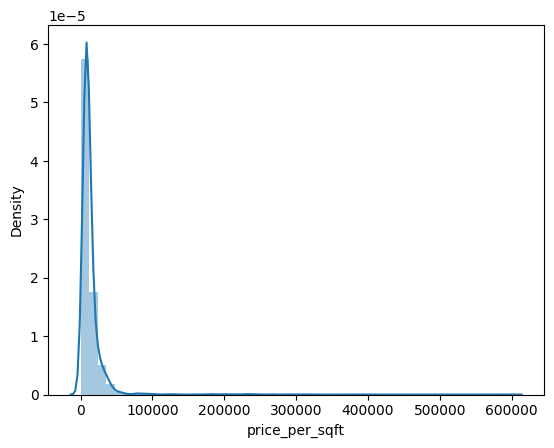

In [ ]:
sns.distplot(df['price_per_sqft'])

In [ ]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(350,
 count       350.000000
 mean      52761.314286
 std       61475.221400
 min       24390.000000
 25%       28134.000000
 50%       33333.000000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [ ]:
df[df['price_per_sqft'] > 100000].sort_values('price_per_sqft',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,Carpet_area,Super_built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
471,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,400.0,NaN,NaN,1,1,0,1,0,semifurnished,136
508,house,dlf city plots phase 2,sector 25,10.00,400000.0,250.0,Plot area 250(23.23 sq.m.),12,12,4,4.0,North,Relatively New,250.0,NaN,NaN,1,1,0,0,0,furnished,119
258,house,independent,sector 12,6.00,315789.0,190.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...,9,6,2,2.0,North-East,Old Property,NaN,1600.0,NaN,0,0,0,0,0,unfurnished,0
430,house,ansal,sector 43,1.85,308333.0,60.0,Plot area 60(5.57 sq.m.),8,8,4,5.0,North-West,Relatively New,60.0,NaN,NaN,0,0,0,0,0,unfurnished,59
750,house,uppal southend,sector 49,6.75,290948.0,232.0,Plot area 232(21.55 sq.m.),12,12,4,NaN,West,Moderately Old,232.0,NaN,NaN,1,1,0,1,1,furnished,53
695,house,unitech nirvana birch court,sector 50,7.10,283333.0,251.0,Plot area 240(22.3 sq.m.),3,3,3,1.0,East,Moderately Old,240.0,NaN,NaN,0,1,0,0,0,unfurnished,53
767,house,independent,sector 57,8.00,266666.0,300.0,Plot area 300(27.87 sq.m.),5,4,3,2.0,North,Relatively New,300.0,NaN,NaN,1,1,0,1,0,unfurnished,26
520,house,dlf city plots phase 2,sector 25,10.50,261194.0,402.0,Plot area 402(37.35 sq.m.),4,4,2,2.0,East,Old Property,402.0,NaN,NaN,0,1,0,1,0,semifurnished,100
311,house,huda plot sector 38,sector 38,4.30,245398.0,175.0,Plot area 163(15.14 sq.m.)Built Up area: 145 s...,13,13,4,5.0,North-West,Relatively New,145.0,NaN,NaN,0,0,0,0,0,furnished,13
483,house,independent,sector 55,1.45,241666.0,60.0,Plot area 60(5.57 sq.m.),4,4,4,4.0,East,Relatively New,60.0,NaN,NaN,0,0,1,0,0,unfurnished,76


In [ ]:
outliers_sqft.sort_values('price_per_sqft',ascending=False).head(20)


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,Carpet_area,Super_built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
471,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,400.0,NaN,NaN,1,1,0,1,0,semifurnished,136
508,house,dlf city plots phase 2,sector 25,10.00,400000.0,250.0,Plot area 250(23.23 sq.m.),12,12,4,4.0,North,Relatively New,250.0,NaN,NaN,1,1,0,0,0,furnished,119
258,house,independent,sector 12,6.00,315789.0,190.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...,9,6,2,2.0,North-East,Old Property,NaN,1600.0,NaN,0,0,0,0,0,unfurnished,0
430,house,ansal,sector 43,1.85,308333.0,60.0,Plot area 60(5.57 sq.m.),8,8,4,5.0,North-West,Relatively New,60.0,NaN,NaN,0,0,0,0,0,unfurnished,59
750,house,uppal southend,sector 49,6.75,290948.0,232.0,Plot area 232(21.55 sq.m.),12,12,4,NaN,West,Moderately Old,232.0,NaN,NaN,1,1,0,1,1,furnished,53
695,house,unitech nirvana birch court,sector 50,7.10,283333.0,251.0,Plot area 240(22.3 sq.m.),3,3,3,1.0,East,Moderately Old,240.0,NaN,NaN,0,1,0,0,0,unfurnished,53
767,house,independent,sector 57,8.00,266666.0,300.0,Plot area 300(27.87 sq.m.),5,4,3,2.0,North,Relatively New,300.0,NaN,NaN,1,1,0,1,0,unfurnished,26
520,house,dlf city plots phase 2,sector 25,10.50,261194.0,402.0,Plot area 402(37.35 sq.m.),4,4,2,2.0,East,Old Property,402.0,NaN,NaN,0,1,0,1,0,semifurnished,100
311,house,huda plot sector 38,sector 38,4.30,245398.0,175.0,Plot area 163(15.14 sq.m.)Built Up area: 145 s...,13,13,4,5.0,North-West,Relatively New,145.0,NaN,NaN,0,0,0,0,0,furnished,13
483,house,independent,sector 55,1.45,241666.0,60.0,Plot area 60(5.57 sq.m.),4,4,4,4.0,East,Relatively New,60.0,NaN,NaN,0,0,1,0,0,unfurnished,76


In [ ]:
outliers_sqft[np.abs(round(outliers_sqft['price']/outliers_sqft['area']*10000000) -outliers_sqft['price_per_sqft'])>10]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,Carpet_area,Super_built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
311,house,huda plot sector 38,sector 38,4.3,245398.0,175.0,Plot area 163(15.14 sq.m.)Built Up area: 145 s...,13,13,4,5.0,North-West,Relatively New,145.0,NaN,NaN,0,0,0,0,0,furnished,13
505,house,eros rosewood city,sector 49,1.6,31481.0,508.0,Plot area 60(50.17 sq.m.),4,4,3,4.0,East,New Property,540.0,NaN,NaN,0,0,0,0,0,unfurnished,25
695,house,unitech nirvana birch court,sector 50,7.1,283333.0,251.0,Plot area 240(22.3 sq.m.),3,3,3,1.0,East,Moderately Old,240.0,NaN,NaN,0,1,0,0,0,unfurnished,53
1105,flat,puri the aravallis,sector 61,3.9,33209.0,1174.0,Carpet area: 1249.65 (116.1 sq.m.),3,4,4,33.0,South,Under Construction,NaN,1249.688790,NaN,0,1,0,0,0,unfurnished,183
3032,flat,breez global hill view,sohna road,2.6,46917.0,554.0,Carpet area: 554.16 (51.48 sq.m.),2,2,2,6.0,NaN,New Property,NaN,554.125572,NaN,0,0,0,0,0,unfurnished,46


In [ ]:
# outliers_sqft.to_excel('outliers.xlsx')

In [ ]:
outliers_sqft[outliers_sqft['price_per_sqft'] >500000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,Carpet_area,Super_built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
471,house,emaar the palm springs,sector 54,24.0,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,400.0,NaN,NaN,1,1,0,1,0,semifurnished,136


In [ ]:
outliers_sqft['Area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

<ipython-input-26-a3eaf9058752>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['Area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [ ]:
outliers_sqft[(outliers_sqft['Area'] - outliers_sqft['area'] ) !=0]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,Carpet_area,Super_built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,Area
1,house,independent,sector 43,2.10,38251.0,549.0,Plot area 61(51 sq.m.),10,10,4,5.0,West,New Property,549.0,NaN,NaN,0,1,0,0,0,unfurnished,26,4941.0
3,house,independent,sector 43,3.00,53763.0,558.0,Plot area 62(51.84 sq.m.),12,12,4,5.0,West,New Property,558.0,NaN,NaN,0,0,0,0,1,semifurnished,26,5022.0
98,house,independent,laxma,0.58,86567.0,67.0,Plot area 67(6.22 sq.m.),2,2,1,2.0,West,Moderately Old,67.0,NaN,NaN,0,0,0,1,1,unfurnished,6,603.0
99,house,independent,laxma,0.65,92857.0,70.0,Plot area 70(6.5 sq.m.),1,1,1,1.0,South-East,Moderately Old,70.0,NaN,NaN,0,0,0,0,1,unfurnished,19,630.0
100,house,independent,laxma,0.61,100000.0,61.0,Plot area 61(5.67 sq.m.),2,2,2,2.0,South-East,Moderately Old,61.0,NaN,NaN,0,0,0,0,1,unfurnished,12,549.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,house,dlf city phase 1,sector 26,3.25,33129.0,981.0,Plot area 109(91.14 sq.m.),3,3,3,2.0,West,Old Property,981.0,NaN,NaN,1,0,0,0,0,semifurnished,85,8829.0
848,flat,ompee k s residency,sector 110,1.60,26936.0,594.0,Carpet area: 66 (55.18 sq.m.),2,2,2,1.0,NaN,Relatively New,NaN,66.000000,NaN,0,0,0,0,0,unfurnished,0,5346.0
2864,flat,housing board colony,sector 51,0.30,41666.0,72.0,Carpet area: 72 (6.69 sq.m.),1,1,0,0.0,NaN,Moderately Old,NaN,72.000000,NaN,1,0,0,0,0,unfurnished,13,648.0
3032,flat,breez global hill view,sohna road,2.60,46917.0,554.0,Carpet area: 554.16 (51.48 sq.m.),2,2,2,6.0,NaN,New Property,NaN,554.125572,NaN,0,0,0,0,0,unfurnished,46,4986.0


In [ ]:
x=df[df['price_per_sqft']<20000]
(x['area']/x['bedRoom']).quantile(0.02)

198.072

In [ ]:
temp=df[~((df['floorNum']==0)|(df['floorNum'] == -1))]

In [ ]:
temp=df[df['floorNum'] == 1]

In [ ]:
temp[((temp['area']/temp['bedRoom']*temp['floorNum'])<150)& (temp['bedRoom']>4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,Carpet_area,Super_built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
167,house,independent,sector 6,1.0,41666.0,240.0,Built Up area: 240 (22.3 sq.m.),6,4,0,3.0,NaN,Undefined,240.0,NaN,NaN,0,0,0,0,0,unfurnished,0
317,house,ardee city,sector 52,5.5,183333.0,300.0,Plot area 300(27.87 sq.m.),9,9,4,3.0,South,Moderately Old,300.0,NaN,NaN,0,1,0,1,1,semifurnished,24
767,house,independent,sector 57,8.0,266666.0,300.0,Plot area 300(27.87 sq.m.),5,4,3,2.0,North,Relatively New,300.0,NaN,NaN,1,1,0,1,0,unfurnished,26


In [ ]:
df.drop(index,inplace=True)

In [ ]:
df.loc[df['areaWithType'].str.contains('Plot area', na=False) & (df['floorNum'] != 1), 'area'] /= df['floorNum']

In [ ]:
df.loc[df['areaWithType'].str.contains('Plot Area', na=False) & (df['floorNum'] != 1), 'Built_up_area'] = df['area']


In [ ]:
index=df[df.area ==0].index

In [ ]:
df.loc[index]['area'] = df.loc[index]['Built_up_area']

In [ ]:
temp =df[df.area == 0]

In [ ]:
temp['area']= temp['Built_up_area']

<ipython-input-81-b0c5b6609827>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['area']= temp['Built_up_area']


In [ ]:
df.update(temp)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,Carpet_area,Super_built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


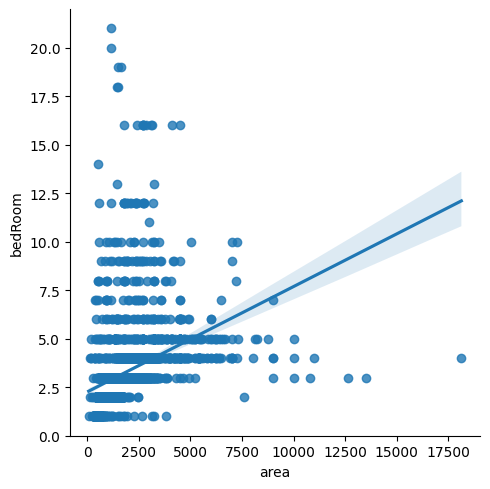

In [ ]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [ ]:
df[(df['area']/df['bedRoom'])<150].index

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,Carpet_area,Super_built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
167,house,independent,sector 6,1.00,41666.0,240.0,Built Up area: 240 (22.3 sq.m.),6,4,0,3.0,NaN,Undefined,240.0,NaN,NaN,0,0,0,0,0,unfurnished,0
172,house,independent,sector 9,0.42,9333.0,450.0,Built Up area: 450 (41.81 sq.m.),5,3,2,2.0,NaN,Undefined,450.0,NaN,NaN,0,0,0,0,0,unfurnished,0
180,house,independent,sector 9,0.22,7407.0,297.0,Carpet area: 33 (27.59 sq.m.),2,2,2,1.0,NaN,Undefined,NaN,33.0,NaN,0,0,0,0,0,unfurnished,0
190,house,independent,sector 9,1.10,55000.0,400.0,Plot area 200(18.58 sq.m.),4,3,1,2.0,North-East,Old Property,200.0,NaN,NaN,0,0,0,0,0,unfurnished,0
197,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,4,4.0,North,New Property,1600.0,NaN,NaN,0,0,0,0,0,furnished,128
201,house,independent,sector 7,1.35,40909.0,330.0,Built Up area: 330 (30.66 sq.m.),4,5,0,3.0,NaN,Undefined,330.0,NaN,NaN,0,0,0,0,0,unfurnished,0
222,house,independent,sector 17,0.32,22068.0,145.0,Built Up area: 145 (13.47 sq.m.),2,2,0,3.0,NaN,Undefined,145.0,NaN,NaN,0,0,0,0,0,unfurnished,0
243,house,surendra homes dayaindependentd colony,sector 6,0.75,15625.0,480.0,Built Up area: 480 (44.59 sq.m.),4,4,2,1.0,NaN,Undefined,480.0,NaN,NaN,0,0,0,0,0,unfurnished,0
253,house,independent,sector 28,4.50,125000.0,360.0,Built Up area: 360 (33.45 sq.m.),4,4,0,4.0,NaN,Undefined,360.0,NaN,NaN,0,0,0,0,0,unfurnished,0
317,house,ardee city,sector 52,5.50,183333.0,900.0,Plot area 300(27.87 sq.m.),9,9,4,3.0,South,Moderately Old,300.0,NaN,NaN,0,1,0,1,1,semifurnished,24


In [ ]:
df.drop(index,inplace=True)

7

In [ ]:
df['price_per_sqft'] = round(df['price']*10000000/df['area'])

<ipython-input-139-36ba36fd7ca7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = round(df['price']*10000000/df['area'])


<Axes: ylabel='price_per_sqft'>

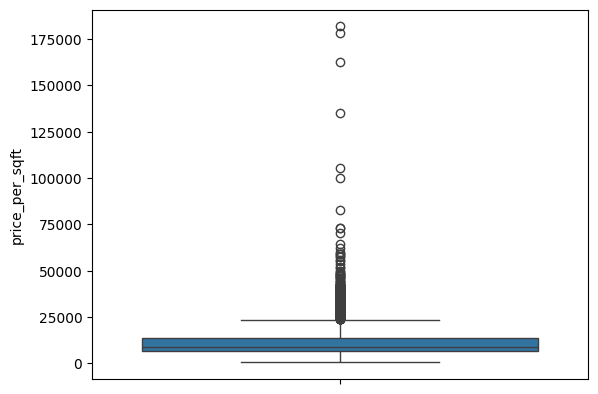

In [ ]:
sns.boxplot(df['price_per_sqft'])

In [ ]:
df

In [ ]:
df.shape

(3572, 23)

In [ ]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,Carpet_area,Super_built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3,house,independent,sector 43,3.00,53763.0,558.000000,Plot area 62(51.84 sq.m.),12,12,4,5.0,West,New Property,558.0,NaN,NaN,0,0,0,0,1,semifurnished,26
104,house,independent,sector 57,6.25,70489.0,886.666667,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,4,3.0,North-East,New Property,2660.0,2500.0,NaN,0,1,0,0,0,semifurnished,63
111,house,unitech aspen greens,sector 50,6.95,64352.0,1080.000000,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,2.0,North-East,Moderately Old,2160.0,1720.0,NaN,0,1,0,0,0,unfurnished,186
146,house,spaze privy,sector 72,3.10,178258.0,173.904762,Plot area 3653(339.37 sq.m.),5,5,4,21.0,NaN,Relatively New,3652.0,NaN,NaN,0,0,0,0,0,unfurnished,0
190,house,independent,sector 9,1.10,55000.0,200.000000,Plot area 200(18.58 sq.m.),4,3,1,2.0,North-East,Old Property,200.0,NaN,NaN,0,0,0,0,0,unfurnished,0
265,house,independent,sector 24,3.20,59259.0,540.000000,Plot area 60(50.17 sq.m.),14,14,4,6.0,West,Relatively New,540.0,NaN,NaN,0,0,0,0,0,unfurnished,12
319,house,indiabulls centrum park,sector 103,3.25,162541.0,199.950000,Plot area 4000(371.61 sq.m.),4,3,4,20.0,NaN,Under Construction,3999.0,NaN,NaN,0,0,0,0,0,unfurnished,52
364,house,unitech uniworld resorts,sector 33,10.00,181818.0,550.000000,Plot area 550(51.1 sq.m.),5,6,3,4.0,North-East,New Property,550.0,NaN,NaN,1,1,0,0,0,unfurnished,24
381,house,independent,sector 13,9.00,100000.0,900.000000,Plot area 900(83.61 sq.m.),10,5,4,4.0,NaN,Old Property,900.0,NaN,NaN,0,0,0,0,0,unfurnished,0
463,house,independent,sector 26,14.75,51864.0,2844.000000,Plot area 316(264.22 sq.m.),16,20,4,4.0,East,New Property,2843.0,NaN,NaN,1,1,1,1,0,unfurnished,171


<Axes: ylabel='area'>

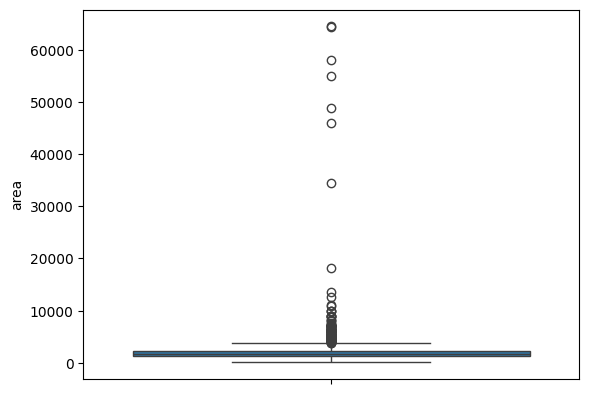

In [ ]:
sns.boxplot(df['area'])

In [ ]:
df=df[df['area']<100000]

In [ ]:
df[df['area']>20000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,Carpet_area,Super_built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
896,flat,pyramid elite,sector 86,0.46,79.0,58141.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,58141.0,NaN,0,0,0,0,0,unfurnished,20
2076,flat,ramsons kshitij,sector 95,0.24,53.0,45966.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,45966.0,NaN,0,0,0,0,1,unfurnished,39
2079,flat,rof ananda,sector 95,0.33,60.0,54917.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,54917.0,NaN,0,0,0,0,0,unfurnished,41
2080,flat,rof ananda,sector 95,0.38,58.0,64412.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,64412.0,NaN,0,0,0,0,0,unfurnished,57
2081,flat,rof ananda,sector 95,0.21,61.0,34401.0,Carpet area: 34401 (3195.96 sq.m.),1,1,1,13.0,North,Relatively New,NaN,34401.0,NaN,0,0,0,0,0,unfurnished,80
2201,flat,signature the serenas,sohna road,0.28,57.0,48811.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,48811.0,NaN,1,0,0,0,0,unfurnished,40
3085,flat,rof ananda,sector 95,0.38,58.0,64529.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,64529.0,NaN,1,0,0,0,0,unfurnished,20


In [ ]:
df=df[df['area']<20000]

<Axes: ylabel='area'>

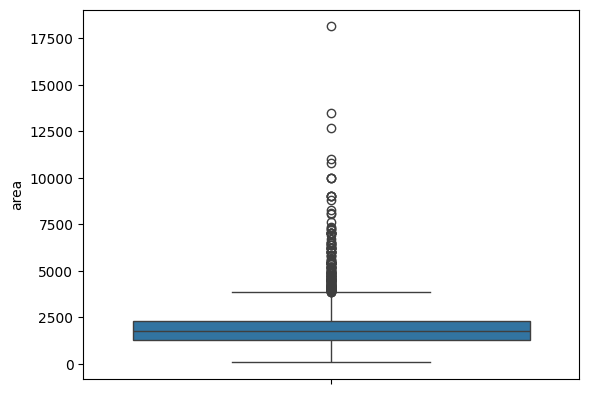

In [ ]:
sns.boxplot(df['area'])

In [ ]:
df.loc[(df['area'] > 30000) & df['Built_up_area'].notna(), 'area'] = df['Built_up_area']


In [ ]:
df.loc[(df['area'] > 30000) & df['Carpet_area'].notna(), 'area'] = df['Carpet_area']

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,Carpet_area,Super_built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,bptp visionnaire,sector 70,5.25,20115.0,2610.0,Plot area 290(242.48 sq.m.),5,4,4,3.0,North-East,New Property,2609.0,NaN,NaN,0,1,0,0,0,unfurnished,53
1,house,independent,sector 43,2.10,38251.0,549.0,Plot area 61(51 sq.m.),10,10,4,5.0,West,New Property,549.0,NaN,NaN,0,1,0,0,0,unfurnished,26
2,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,4,5.0,North,Relatively New,1161.0,NaN,NaN,0,1,0,0,0,semifurnished,53
3,house,independent,sector 43,3.00,53763.0,558.0,Plot area 62(51.84 sq.m.),12,12,4,5.0,West,New Property,558.0,NaN,NaN,0,0,0,0,1,semifurnished,26
4,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,4,4.0,East,Relatively New,1152.0,NaN,NaN,0,1,0,0,0,semifurnished,26


In [ ]:
df['bedRoom/floor'] = df['bedRoom'] / df['floorNum'].replace(0, 1)


<ipython-input-159-61e1adf9333e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bedRoom/floor'] = df['bedRoom'] / df['floorNum'].replace(0, 1)


In [ ]:
index=df[(df['area']/df['bedRoom/floor'] <200)& (df['bedRoom/floor']>3)].index

In [ ]:
df.drop(index,inplace=True)

<ipython-input-164-3ea734cde08d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index,inplace=True)


In [ ]:
df['bedRoom']= round(df['bedRoom/floor'])

In [ ]:
df.drop('bedRoom/floor',axis=1,inplace=True)

In [ ]:
df['bedRoom'].value_counts()

,count
bedRoom,
0.0,1781
1.0,727
2.0,622
3.0,242
4.0,93
5.0,16
10.0,4
6.0,3
8.0,2


In [ ]:
df['bedRoom'] = df['bedRoom'].abs()

In [ ]:
df[df['bedRoom']>=10]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,Carpet_area,Super_built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
144,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10.0,7,3,1.0,NaN,Old Property,2249.0,NaN,NaN,1,1,0,1,1,semifurnished,0
157,house,independent,sector 13,2.25,6944.0,3240.0,Carpet area: 360 (301.01 sq.m.),10.0,10,2,1.0,East,Undefined,NaN,360.0,NaN,0,0,0,0,0,unfurnished,0
337,house,dlf city plot phase 4,sector 28,13.00,17931.0,7250.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10,4,1.0,NaN,Undefined,NaN,7250.0,NaN,0,0,0,0,0,unfurnished,0
408,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10.0,1,0,1.0,NaN,New Property,2250.0,NaN,NaN,0,0,0,0,0,unfurnished,0


<Axes: ylabel='price'>

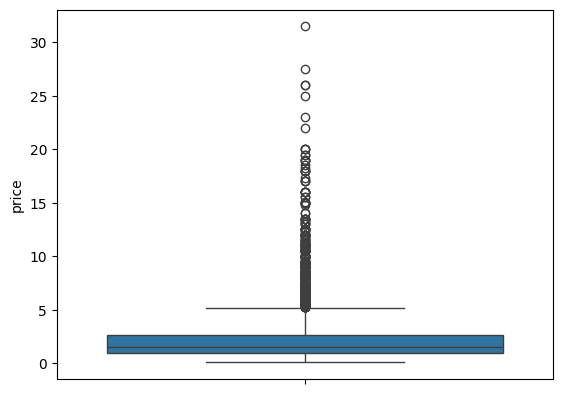

In [ ]:
sns.boxplot(df['price'])

In [ ]:
df.sample(10)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,Carpet_area,Super_built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1221,flat,m3m latitude,sector 65,4.60,26791.0,1717.0,Carpet area: 1717 (159.51 sq.m.),0.0,3,3,7.0,South,New Property,NaN,1717.0,NaN,1,1,1,1,0,semifurnished,157
3158,flat,breez global hill view,sohna road,0.32,5776.0,554.0,Carpet area: 554 (51.47 sq.m.),0.0,2,2,19.0,North,Relatively New,NaN,554.0,NaN,0,0,0,0,0,unfurnished,33
3095,flat,m3m soulitude,sector 89,1.28,8828.0,1450.0,Carpet area: 1450 (134.71 sq.m.),1.0,3,2,4.0,NaN,Under Construction,NaN,1450.0,NaN,1,0,0,0,0,unfurnished,157
986,flat,krrish florence estate,sector 70,1.25,6702.0,1865.0,Super Built up area 1865(173.26 sq.m.),0.0,3,3,18.0,North-East,Under Construction,NaN,NaN,1865.0,0,0,0,0,0,unfurnished,64
285,house,independent,sector 31,4.60,32258.0,1426.0,Built Up area: 1426 (132.48 sq.m.)Carpet area:...,1.0,2,2,2.0,East,Undefined,1426.0,1069.0,NaN,0,0,0,0,0,unfurnished,0
2645,flat,shapoorji pallonji joyville gurugram,sector 102,1.30,17687.0,735.0,Super Built up area 1215(112.88 sq.m.)Built Up...,2.0,2,3,0.0,East,Relatively New,1009.0,734.8,1215.0,0,0,1,0,0,unfurnished,153
3094,flat,ashiana mulberry,sohna road,0.74,6016.0,1230.0,Carpet area: 1230 (114.27 sq.m.),0.0,2,4,12.0,NaN,Relatively New,NaN,1230.0,NaN,0,0,0,0,0,unfurnished,87
1624,flat,hsiidc sidco aravali,manesar,0.90,3478.0,2588.0,Super Built up area 2588(240.43 sq.m.)Built Up...,0.0,3,4,8.0,East,Moderately Old,1900.0,NaN,2588.0,0,1,0,0,0,unfurnished,33
1096,flat,dlf carlton estate,sector 43,2.00,14215.0,1407.0,Super Built up area 1407(130.71 sq.m.),1.0,3,2,5.0,South-West,Moderately Old,NaN,NaN,1407.0,0,0,0,0,0,unfurnished,83
1332,flat,umang monsoon breeze,sector 78,0.62,5004.0,1239.0,Super Built up area 1239(115.11 sq.m.)Built Up...,0.0,2,1,7.0,South,Moderately Old,1115.0,947.0,1239.0,0,0,1,0,0,unfurnished,156


In [ ]:
df.to_csv('Gurgaon_properties_outelier_treated.csv',index=False)

### Missing Value imputation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Gurgaon_properties_outelier_treated.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Gurgaon_properties_outelier_treated.csv'

In [ ]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,3
bathroom,0
balcony,0


In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,Built_up_area,Carpet_area,Super_built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,bptp visionnaire,sector 70,5.25,20115.0,2610.0,Plot area 290(242.48 sq.m.),2.0,4,4,...,2609.0,NaN,NaN,0,1,0,0,0,unfurnished,53
1,house,independent,sector 43,2.10,38251.0,549.0,Plot area 61(51 sq.m.),2.0,10,4,...,549.0,NaN,NaN,0,1,0,0,0,unfurnished,26
2,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),4.0,21,4,...,1161.0,NaN,NaN,0,1,0,0,0,semifurnished,53
3,house,independent,sector 43,3.00,53763.0,558.0,Plot area 62(51.84 sq.m.),2.0,12,4,...,558.0,NaN,NaN,0,0,0,0,1,semifurnished,26
4,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),5.0,20,4,...,1152.0,NaN,NaN,0,1,0,0,0,semifurnished,26


<Axes: xlabel='Built_up_area', ylabel='Super_built_up_area'>

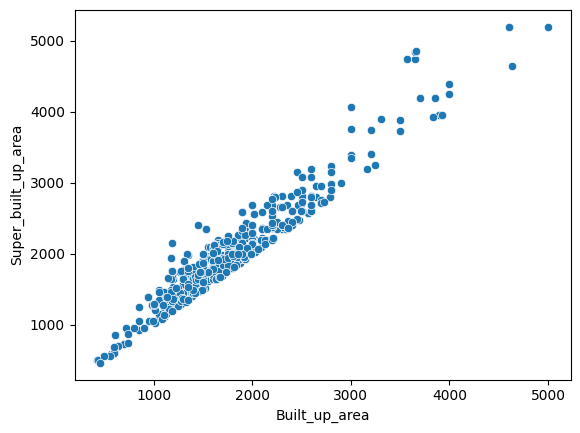

In [ ]:
sns.scatterplot(x=df['Built_up_area'],y=df['Super_built_up_area'])

<Axes: xlabel='Built_up_area', ylabel='Carpet_area'>

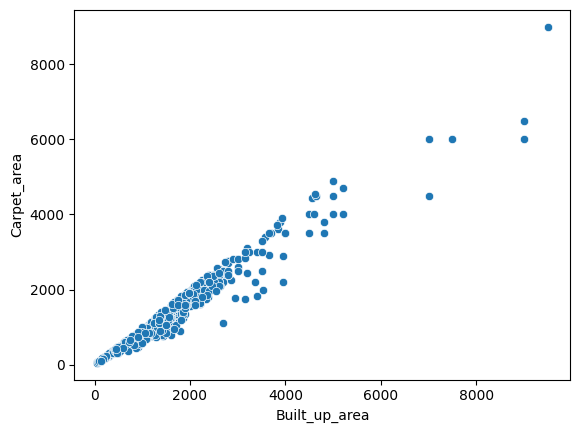

In [ ]:
sns.scatterplot(x=df['Built_up_area'],y=df['Carpet_area'])

<Axes: xlabel='Super_built_up_area', ylabel='Carpet_area'>

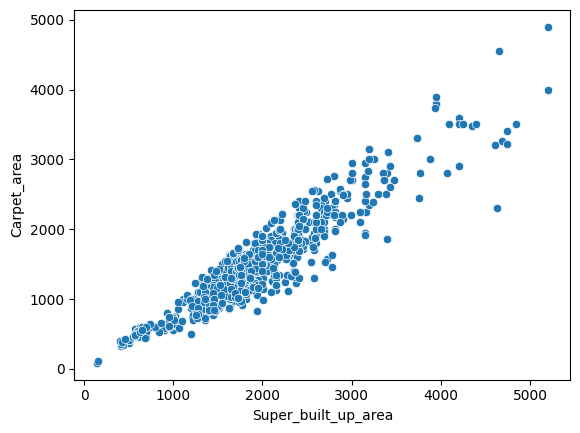

In [ ]:
sns.scatterplot(x=df['Super_built_up_area'],y=df['Carpet_area'])

In [ ]:
df[~((df['Built_up_area'].isnull()) | (df['Carpet_area'].isnull()) | (df['Super_built_up_area'].isnull()) )]

NameError: name 'df' is not defined